In [1]:
library(ggplot2)

set.seed(30027)
x = rnorm(100, 5, 2)

output = function(param, name) {
    print(name)
    print('mean value:')
    print(mean(param))
    print('90%  CI:')
    print(quantile(param, c(0.05,0.95)))
    hist(param, prob=TRUE, main=name)            # prob=TRUE for probabilities not counts
    lines(density(param))             # add a density estimate with defaults
    lines(density(param, adjust=2), lty="dotted")   # add another "smoother" density
}

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


# Q1
## Define algortihm

In [2]:
# (b)

gibbs <- function(n, data, mu=1, tau=1) {
  samples = list(mu=numeric(n), tau=numeric(n));
  xbar = mean(data)
  m = length(data)
  
  for (i in 1:n) {
    mu = rnorm(1, xbar, sqrt(1/(m * tau)))
    tau = rgamma(1, m/2, sum((data-mu)^2)/2)
    
    samples$mu[i] = mu
    samples$tau[i] = tau
  }
  return(samples)
}

### (b) Trace plot

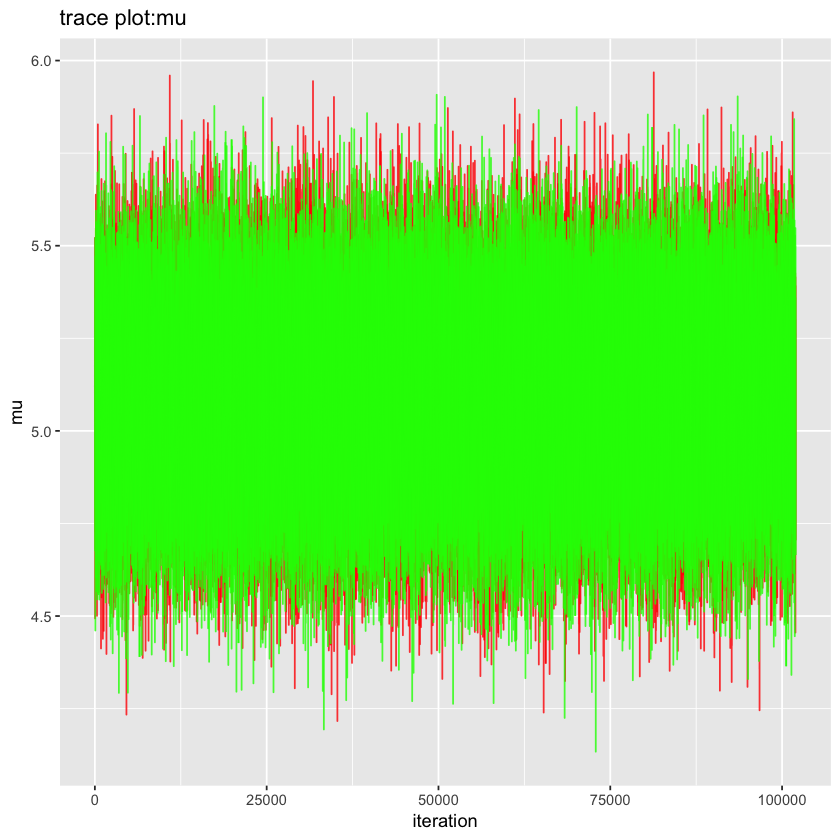

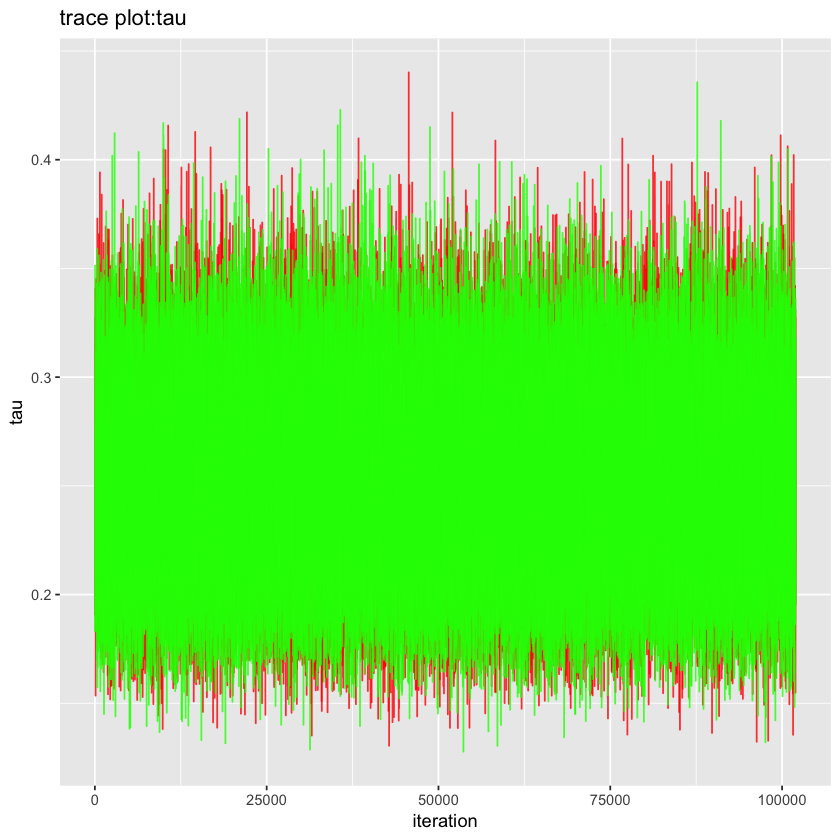

In [3]:
set.seed(42)
N = 102000
res1 = gibbs(N, x, 1000, 0.1)
res2 = gibbs(N, x, 0, 999)

df = data.frame(x = 1:N, mu1=res1$mu, tau1=res1$tau, mu2=res2$mu, tau2=res2$tau)

(ggplot(df, aes(x)) + geom_line(aes(y=mu1), colour="red", alpha=0.8) + 
  geom_line(aes(y=mu2), colour="green", alpha=0.8) + 
  xlab('iteration') + ylab('mu')+ggtitle('trace plot:mu'))


(ggplot(df, aes(x)) + geom_line(aes(y=tau1), colour="red", alpha=0.8) + 
  geom_line(aes(y=tau2), colour="green", alpha=0.8) + 
  xlab('iteration') + ylab('tau')+ggtitle('trace plot:tau'))

(b) They do converge together
### (c) Distribution/histogram/quantile

[1] "mu"
[1] "mean value:"
[1] 5.090795
[1] "90%  CI:"
      5%      95% 
4.757753 5.422978 
[1] "tau"
[1] "mean value:"
[1] 0.2503675
[1] "90%  CI:"
       5%       95% 
0.1949002 0.3116865 


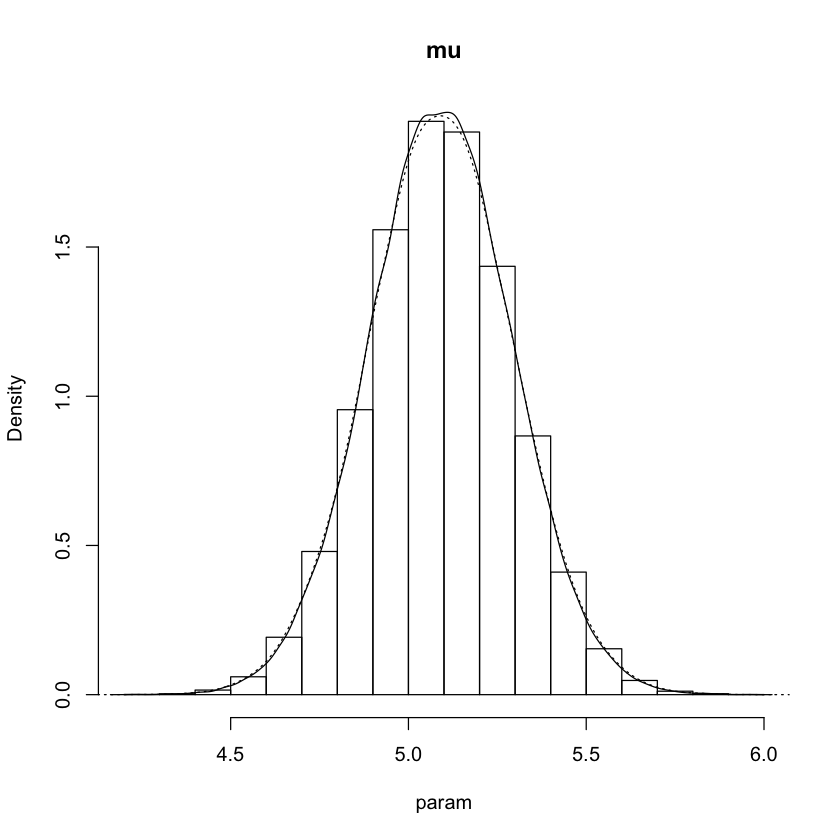

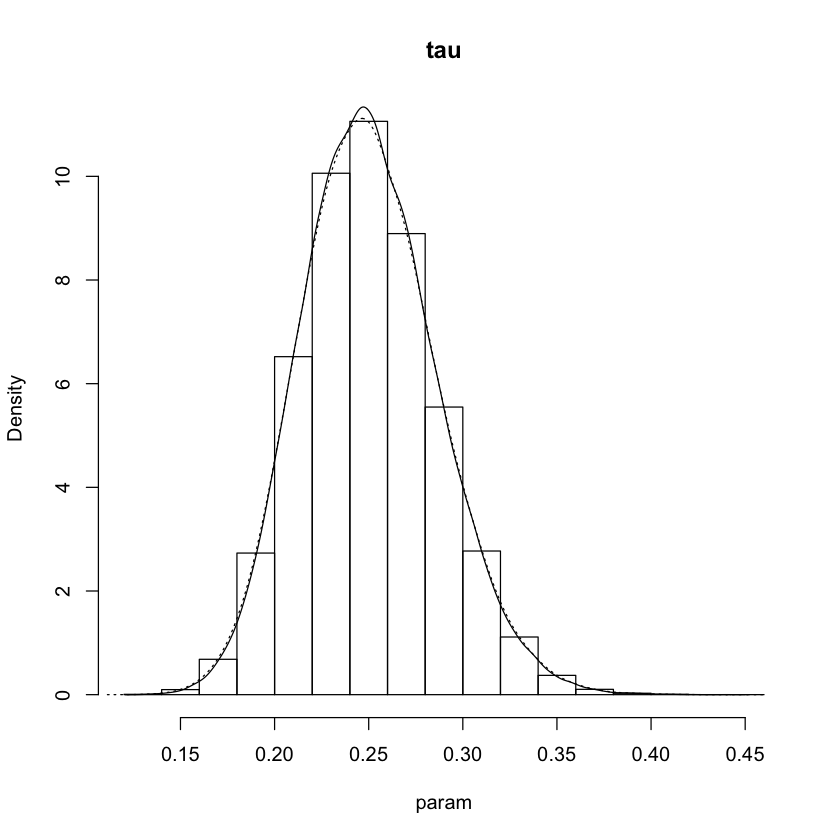

In [4]:
mu = sort(df$mu1[c(2000:length(df$mu1))])
tau = sort(df$tau1[c(2000:length(df$tau1))])

output(mu, 'mu')
output(tau, 'tau')

# Q2

In [5]:
logpiparam <- function(mu, tau, data) {
  prior = log(1 / tau)
  likelihood = sum(dnorm(data, mu, sqrt(1/tau),log = TRUE))
  return(prior + likelihood)
}


mh <- function(n, data, mu=1, tau=1) {
  samples = list(mu=numeric(n), tau=numeric(n));
  xbar = mean(data)
  m = length(data)
  
  for (i in 1:n) {
    tau_ = rgamma(1, 5*tau, 5)
    mu_  = rnorm(1, mu, sqrt(tau_))
  
    qtop = dnorm(mu, mu_, sqrt(tau), log = TRUE) + dgamma(tau, 5*tau_, 5, log = TRUE)
    qbot = dnorm(mu_, mu, sqrt(tau_), log = TRUE) + dgamma(tau_, 5*tau, 5, log = TRUE)
    p.log = qtop + logpiparam(mu_, tau_, data) - (qbot + logpiparam(mu, tau, data))
    if (p.log > log(runif(1))) {
      mu = mu_
      tau = tau_
    }
    
    samples$mu[i] = mu
    samples$tau[i] = tau
  }
  return(samples)
}

### (b) Trace plot

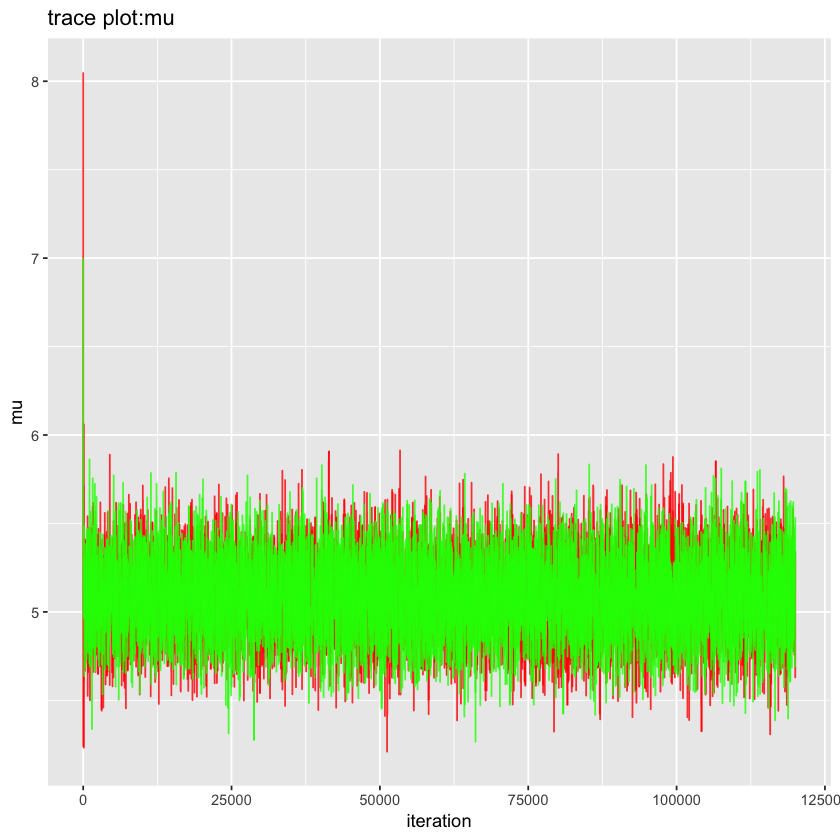

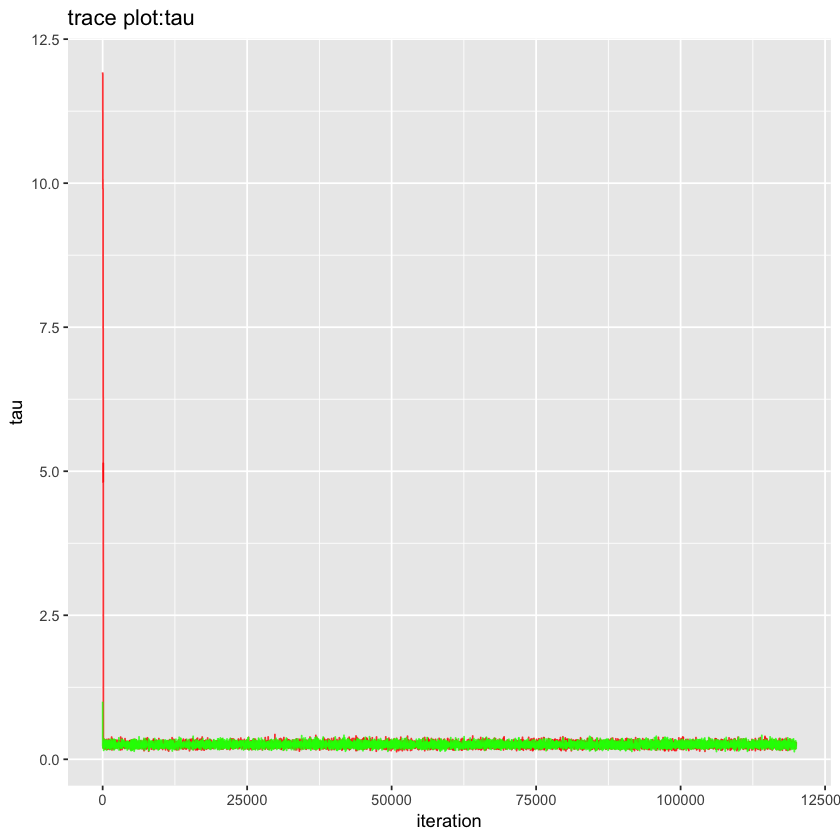

In [6]:
set.seed(42)
N = 120000
res1 = mh(N, x, 10, 10)
res2 = mh(N, x, 7, 1)

df = data.frame(x = 1:N, mu1=res1$mu, tau1=res1$tau, mu2=res2$mu, tau2=res2$tau)

(ggplot(df, aes(x)) + geom_line(aes(y=mu1), colour="red", alpha=0.8) + 
  geom_line(aes(y=mu2), colour="green", alpha=0.8) + 
  xlab('iteration') + ylab('mu')+ggtitle('trace plot:mu'))
(ggplot(df, aes(x)) + geom_line(aes(y=tau1), colour="red", alpha=0.8) + 
  geom_line(aes(y=tau2), colour="green", alpha=0.8) + 
  xlab('iteration') + ylab('tau')+ggtitle('trace plot:tau'))

(b) They do converge together
### (c) Distribution/histogram/quantile

[1] "mu"
[1] "mean value:"
[1] 5.093511
[1] "90%  CI:"
      5%      95% 
4.756718 5.425346 
[1] "tau"
[1] "mean value:"
[1] 0.249857
[1] "90%  CI:"
       5%       95% 
0.1951379 0.3107686 


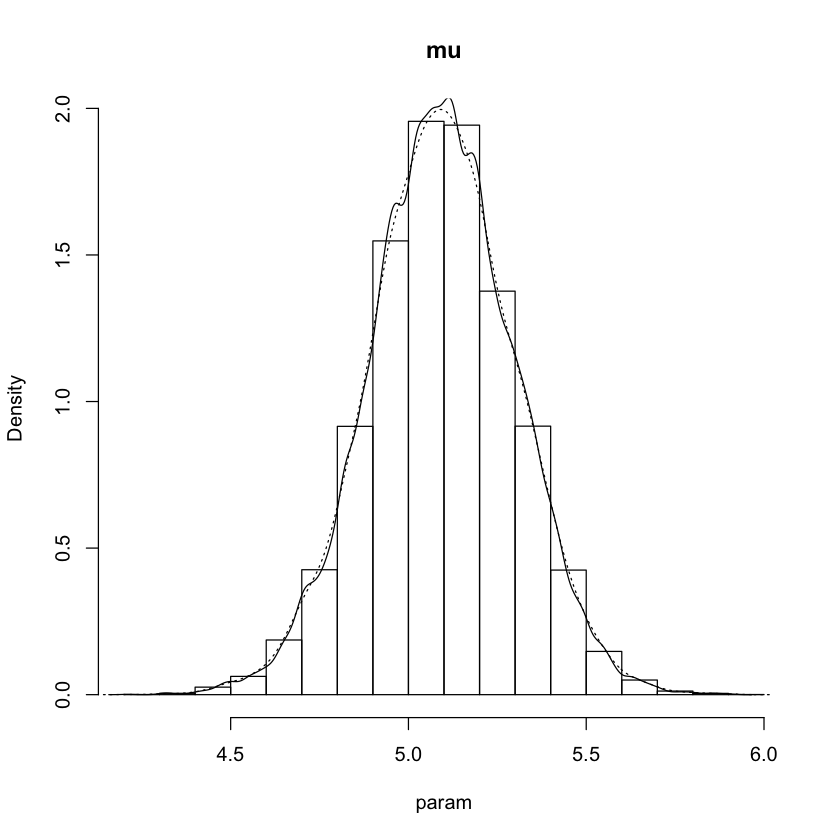

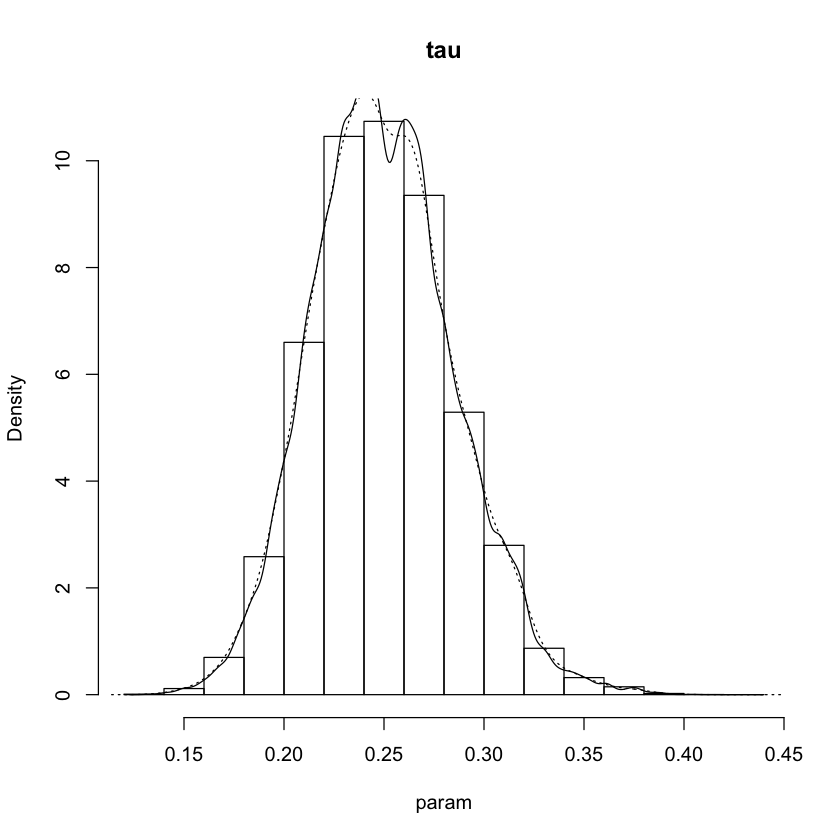

In [7]:
mu = sort(df$mu1[c(2000:length(df$mu1))])
tau = sort(df$tau1[c(2000:length(df$tau1))])

output(mu, 'mu')
output(tau, 'tau')